X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


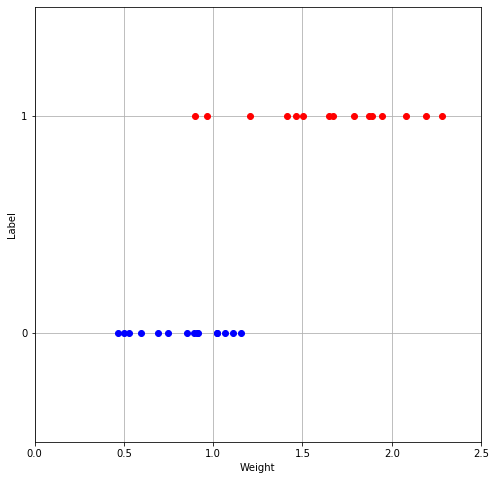

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=0) #시드0인 난수
X_min=0   #최소
X_max=2.5 #최대
X_n=30    #훈련데이터개수(X는 훈련입력데이터,T는 훈련출력데이터) 이거를 30개씩만들예정 
X_col=['cornflowerblue','gray']   #암컷은파란색 수컷은회색
X=np.zeros(X_n)                  #0으로 초기화(무게)
T=np.zeros(X_n,dtype=np.uint8)   #0으로 초기화(0,1 성별) dtype은 데이터타입, uint8은 부호없는 정수 8bit
Dist_s=[0.4,0.8]
Dist_w=[0.8,1.6]
Pi=0.5

for n in range(X_n):  # [0,1,2,...29]
    wk=np.random.rand()  #0~1의 난수생성
    T[n]=0*(wk<Pi)+1*(wk>=Pi) #암컷과 수컷의 확률은 50대50  (wk<Pi)의 조건이 true면 1반환 0.5보다크면 수컷으로
    X[n]=np.random.rand()*Dist_w[T[n]]+Dist_s[T[n]] #T는 0또는1이다. Dist_w[T[n]]에서 T가0이면 Dist_w의 0번째인덱스(첫번째원소)를반환
    #즉 T=0일때는 암컷일때다. 이때 난수*0.4+0.8이 된다. 즉 0.4<난수<1.2의 범위의 난수를 가짐
    #수컷은 0.8<난수<2.4의 난수(무게)
    
print('X='+str(np.round(X,2)))  #소수둘째짜리까지 표현하라 그거를 문자형으로 변환
print('T='+str(T))  

def show_data1(x,t):  #그래프그리는함수
    K=np.max(t)+1   #T에들어있는 원소중에 가장 큰거를 가져와라 그거에 +1해라. T의 최대는 1이므로 K는 2
    for k in range(K):    # K=[0,1]
        if k==0:
            plt.plot(x[t==0],t[t==0],'bo')  #t==0는 벡터t에서 값이 0인 요소의 주소를 의미 이거를 X[]에 넣었다. 즉 성별이 암컷인 애들의 무게를 가져와라
                                             #t[t==0]는 성별이 암컷인 애들의 성별을 가져와라
        else:
            plt.plot(x[t==1],t[t==1],'ro')
            
        plt.grid(True)
        plt.ylim(-0.5,1.5)  #y축범위
        plt.xlim(X_min,X_max)  #x축범위
        plt.yticks([0,1])  #y의 격자를 0과 1만 표시하라
    plt.xlabel('Weight')
    plt.ylabel('Label')
    
fig=plt.figure(figsize=(8,8))
show_data1(X,T)
plt.show()
        
#암컷은 몸무게 0.4~1.2   수컷은 몸무게 0.8~2.4

In [6]:
def logistic(x,w):   # w0, w1을 의미
    y=1/(1+np.exp(-(w[0]*x+w[1])))
    return y

def show_logistic(w):
    xb=np.linspace(X_min,X_max,100)
    y=logistic(xb,w)
    plt.plot(xb,y,'-',linewidth=4)
    
    #결정경계를 찾아주는 부분
    i=np.min(np.where(y>0.5)) #np.where(y>0.5) 이거는 y벡터에서 값이 0.5보다 큰 값들의 주소  그중에서 최소값찾기
                             #즉 0.5보다 큰 값중에 제일 작은거, 경계선에서 한단계위의값을 i로 설정
    B=(xb[i-1]+xb[i])/2      # 앞서 결정한 i와 그 i보다 한단계 낮은 i-1의 평균값, 즉 중간값을 B라고한다
    plt.plot([B,B],[-0.5,1.5],'k--')   # 중간값 B를 세로점선으로 표현 
    plt.grid(True)
    return B

W=[8,-10]
#plt.figure(figsize=(8,6))
#show_logistic(W)
pq=logistic(X,W)
print(pq)

[0.99614462 0.96689817 0.0649928  0.25111907 0.78718691 0.95968397
 0.99973819 0.00194146 0.18675528 0.99946684 0.99868056 0.14129042
 0.06270802 0.31992447 0.8465342  0.13647229 0.04062015 0.05482971
 0.98657016 0.99410243 0.01793338 0.05577104 0.99320105 0.00253538
 0.0112926  0.88226949 0.09163555 0.00311745 0.41147588 0.00529504]


In [16]:
def cee_logistic(w,x,t):
    y=logistic(x,w)
    cee=0
    for n in range(len(y)):
        cee=cee-(t[n]*np.log(y[n])+(1-t[n])*np.log(1-y[n]))
    cee=cee/X_n
    return cee

W=[1,1]
cee_logistic(W,X,T)

1.0288191541851066

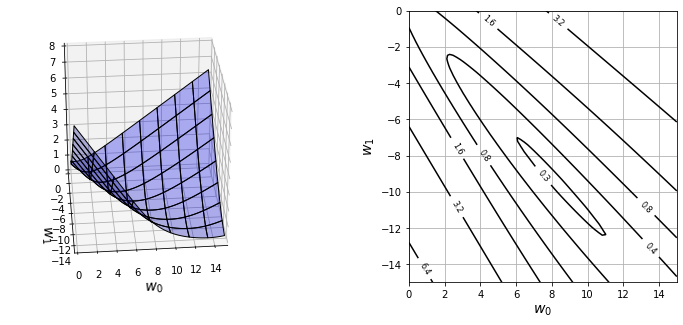

In [21]:
from mpl_toolkits.mplot3d import Axes3D

xn=80  # x축 y축으로 80개씩 점을찍고 그 교점마다 E(w0,w1)의 값을 표시하여 그래프그릴예정
w_range=np.array([[0,15],[-15,0]])  #행렬
x0=np.linspace(w_range[0,0], w_range[0,1],xn)  # 0에서 15까지 80등분
x1=np.linspace(w_range[1,0], w_range[1,1],xn)   #-15에서 0까지 80등분
xx0,xx1=np.meshgrid(x0,x1)   #3차원그래프를그리기위함
C=np.zeros((len(x1),len(x0)))  #영행렬로 초기화
w=np.zeros(2)  #w0, w1 둘다 0으로 초기화
for i0 in range(xn):
    for i1 in range(xn):
        w[0]=x0[i0]
        w[1]=x1[i1]
        C[i1, i0]=cee_logistic(w,X,T)  #cee를 계산해서 C 행렬에다가 넣어줌
        
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.5)
ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,C,color='blue',edgecolor='black',rstride=10,cstride=10,alpha=0.3)
ax.set_xlabel('$w_0$',fontsize=14)
ax.set_ylabel('$w_1$',fontsize=14)
ax.set_xlim(0,15)
ax.set_ylim(-15,0)
ax.set_zlim(0,8)
ax.view_init(30,-95)

plt.subplot(1,2,2)  #contour는 등고선
cout=plt.contour(xx0,xx1,C,20,colors='black',levels=[0.26,0.4,0.8,1.6,3.2,6.4])
cout.clabel(fmt='%.1f',fontsize=8)
plt.xlabel('$w_0$',fontsize=14)
plt.ylabel('$w_1$',fontsize=14)
plt.grid(True)
plt.show()

#등고선 그래프를 봤을때 w0=9 , w1=-9쯤에서 최적값있어보인다

In [22]:
def dcee_logistic(w,x,t):   #기울기구하는함수
    y=logistic(x,w)
    dcee=np.zeros(2)
    for n in range(len(y)):
        dcee[0]=dcee[0]+(y[n]-t[n])*x[n]
        dcee[1]=dcee[1]+(y[n]-t[n])
    dcee=dcee/X_n
    return dcee

W=[1,1]   #(1,1)에서 기울기  w0방향으로는0.30857905 , w1방향으로는0.39485474
dcee_logistic(W,X,T)
        

array([0.30857905, 0.39485474])

w0=8.18, w1=0.00
CEE=0.25
Boundary=1.15


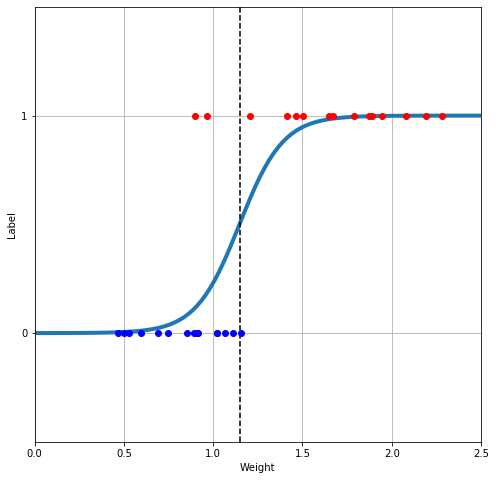

In [23]:
from scipy.optimize import minimize

def fit_logistic(w_init,x,t):
    res1=minimize(cee_logistic,w_init,args=(x,t),jac=dcee_logistic,method="CG")
    #cee_logistic을 최소화한다, x와t는 제외 w에 대해서만 최소화. jac는 기울기를구하는방법
    #CG는 Conjugate Gradient
    return res1.x

plt.figure(figsize=(8,8))
W_init=[1,-1]
W=fit_logistic(W_init,X,T)
print("w0={0:.2f}, w1={1:.2f}".format(W[0],w[1]))
B=show_logistic(W)
show_data1(X,T)
plt.ylim(-0.5,1.5)
plt.xlim(X_min,X_max)
cee=cee_logistic(W,X,T)
print("CEE={0:.2f}".format(cee))
print("Boundary={0:.2f}".format(B))
plt.show()


#결정평면(경계값)은 1.15이다. (세로축 0.5와 그래프가 만나는곳임)